In [28]:
import requests
from bs4 import BeautifulSoup as bs
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
pendant = "https://www.rottentomatoes.com"

In [8]:
start_url = "https://www.rottentomatoes.com/top/"
start_content = requests.get(start_url)
start_soup = bs(start_content.text, "html.parser")

genre_url = []
genre_name = []
# get all genres moveis name and url
genre_list = start_soup.find_all("ul", {"class":"genrelist"} )
for genre in genre_list:
    for ele in genre.find_all("a", {"class":"articleLink unstyled"}):
        genre_url.append(pendant + ele["href"])
        genre_name.append(ele.get_text().replace("Top 100 ",""))

In [32]:
genre_box = []
cast_box = {}

for url, name in zip(genre_url, genre_name):
    box_sum = 0
    genre_content = requests.get(url)
    genre_soup = bs(genre_content.text, "html.parser")
    
    # find movies url in each genre
    movie_url = []
    for td in genre_soup.find_all("td"):
        for ele in td.find_all("a", {"class":"unstyled articleLink"}):
            print(pendant + ele["href"])
            movie_url.append(pendant + ele["href"])
            
    # find cast and box each movie
    box_sum = 0 # box sum of this genre
    for url in movie_url:
        movie_content = requests.get(url)
        movie_soup = bs(movie_content.text, "html.parser")
        
        # find box
        box = 0
        for b in movie_soup.find_all("li", {"class":"meta-row clearfix"}):
            if "Box Office" in b.get_text():
                box = int(b.get_text().split("$")[-1].strip().replace(",", ""))
        
        # find cast and store it's box in cast_box
        # if box is 0, not need to find cast
        if(box != 0):
            box_sum += box
            for media in movie_soup.find_all("div", {"class":"media-body"}):
                for star in media.find_all("a", {"class", "unstyled articleLink"}):
                    cast = star.get_text().strip()
                    if cast not in cast_box:
                        cast_box[cast] = box
                    else:
                        cast_box[cast] += box
    genre_box.append(int(box_sum))

https://www.rottentomatoes.com/m/black_panther_2018
https://www.rottentomatoes.com/m/mad_max_fury_road
https://www.rottentomatoes.com/m/dunkirk_2017
https://www.rottentomatoes.com/m/wonder_woman_2017
https://www.rottentomatoes.com/m/coco_2017
https://www.rottentomatoes.com/m/star_wars_the_last_jedi
https://www.rottentomatoes.com/m/thor_ragnarok_2017
https://www.rottentomatoes.com/m/logan_2017
https://www.rottentomatoes.com/m/1011615-king_kong
https://www.rottentomatoes.com/m/1000355-adventures_of_robin_hood
https://www.rottentomatoes.com/m/incredibles_2
https://www.rottentomatoes.com/m/1013775-metropolis
https://www.rottentomatoes.com/m/star_wars_episode_vii_the_force_awakens
https://www.rottentomatoes.com/m/baby_driver
https://www.rottentomatoes.com/m/war_for_the_planet_of_the_apes
https://www.rottentomatoes.com/m/spider_man_homecoming
https://www.rottentomatoes.com/m/seven_samurai_1956
https://www.rottentomatoes.com/m/zootopia
https://www.rottentomatoes.com/m/up
https://www.rottentom

https://www.rottentomatoes.com/m/the_cabinet_of_dr_caligari
https://www.rottentomatoes.com/m/la_grande_illusion
https://www.rottentomatoes.com/m/1013775-metropolis
https://www.rottentomatoes.com/m/nosferatu
https://www.rottentomatoes.com/m/the_battle_of_algiers
https://www.rottentomatoes.com/m/seven_samurai_1956
https://www.rottentomatoes.com/m/1012928-m
https://www.rottentomatoes.com/m/400_blows
https://www.rottentomatoes.com/m/rashomon
https://www.rottentomatoes.com/m/army_of_shadows
https://www.rottentomatoes.com/m/wages_of_fear
https://www.rottentomatoes.com/m/open_city
https://www.rottentomatoes.com/m/tokyo_story
https://www.rottentomatoes.com/m/battleship_potemkin
https://www.rottentomatoes.com/m/the_conformist
https://www.rottentomatoes.com/m/balthazar
https://www.rottentomatoes.com/m/dolce_vita
https://www.rottentomatoes.com/m/let_the_right_one_in
https://www.rottentomatoes.com/m/discreet_charm_of_the_bourgeoisie
https://www.rottentomatoes.com/m/faces_places
https://www.rottent

https://www.rottentomatoes.com/m/lady_bird
https://www.rottentomatoes.com/m/blackkklansman
https://www.rottentomatoes.com/m/modern_times
https://www.rottentomatoes.com/m/it_happened_one_night
https://www.rottentomatoes.com/m/eighth_grade
https://www.rottentomatoes.com/m/coco_2017
https://www.rottentomatoes.com/m/singin_in_the_rain
https://www.rottentomatoes.com/m/the_big_sick
https://www.rottentomatoes.com/m/paddington_2
https://www.rottentomatoes.com/m/beatles_a_hard_days_night
https://www.rottentomatoes.com/m/philadelphia_story
https://www.rottentomatoes.com/m/la_la_land
https://www.rottentomatoes.com/m/zootopia
https://www.rottentomatoes.com/m/toy_story_2
https://www.rottentomatoes.com/m/up
https://www.rottentomatoes.com/m/kind_hearts_and_coronets
https://www.rottentomatoes.com/m/toy_story_3
https://www.rottentomatoes.com/m/three_billboards_outside_ebbing_missouri
https://www.rottentomatoes.com/m/finding_nemo
https://www.rottentomatoes.com/m/dr_strangelove
https://www.rottentomatoes

https://www.rottentomatoes.com/m/black_panther_2018
https://www.rottentomatoes.com/m/lady_bird
https://www.rottentomatoes.com/m/citizen_kane
https://www.rottentomatoes.com/m/blackkklansman
https://www.rottentomatoes.com/m/moonlight_2016
https://www.rottentomatoes.com/m/1003707-casablanca
https://www.rottentomatoes.com/m/dunkirk_2017
https://www.rottentomatoes.com/m/wonder_woman_2017
https://www.rottentomatoes.com/m/la_grande_illusion
https://www.rottentomatoes.com/m/a_quiet_place_2018
https://www.rottentomatoes.com/m/spotlight_2015
https://www.rottentomatoes.com/m/1000626-all_about_eve
https://www.rottentomatoes.com/m/selma
https://www.rottentomatoes.com/m/star_wars_the_last_jedi
https://www.rottentomatoes.com/m/the_shape_of_water_2017
https://www.rottentomatoes.com/m/thor_ragnarok_2017
https://www.rottentomatoes.com/m/arrival_2016
https://www.rottentomatoes.com/m/godfather
https://www.rottentomatoes.com/m/logan_2017
https://www.rottentomatoes.com/m/call_me_by_your_name
https://www.rot

https://www.rottentomatoes.com/m/the_wizard_of_oz_1939
https://www.rottentomatoes.com/m/inside_out_2015
https://www.rottentomatoes.com/m/coco_2017
https://www.rottentomatoes.com/m/et_the_extraterrestrial
https://www.rottentomatoes.com/m/1048445-snow_white_and_the_seven_dwarfs
https://www.rottentomatoes.com/m/incredibles_2
https://www.rottentomatoes.com/m/paddington_2
https://www.rottentomatoes.com/m/toy_story_2
https://www.rottentomatoes.com/m/up
https://www.rottentomatoes.com/m/pinocchio_1940
https://www.rottentomatoes.com/m/the_jungle_book_2016
https://www.rottentomatoes.com/m/toy_story_3
https://www.rottentomatoes.com/m/finding_nemo
https://www.rottentomatoes.com/m/moana_2016
https://www.rottentomatoes.com/m/harry_potter_and_the_deathly_hallows_part_2_2011
https://www.rottentomatoes.com/m/its_a_wonderful_life
https://www.rottentomatoes.com/m/toy_story
https://www.rottentomatoes.com/m/the_lego_movie
https://www.rottentomatoes.com/m/how_to_train_your_dragon
https://www.rottentomatoes.

https://www.rottentomatoes.com/m/citizen_kane
https://www.rottentomatoes.com/m/get_out
https://www.rottentomatoes.com/m/the_cabinet_of_dr_caligari
https://www.rottentomatoes.com/m/the_third_man
https://www.rottentomatoes.com/m/a_quiet_place_2018
https://www.rottentomatoes.com/m/spotlight_2015
https://www.rottentomatoes.com/m/arrival_2016
https://www.rottentomatoes.com/m/1012007-laura
https://www.rottentomatoes.com/m/1013139-maltese_falcon
https://www.rottentomatoes.com/m/argo_2012
https://www.rottentomatoes.com/m/psycho
https://www.rottentomatoes.com/m/night_of_the_hunter
https://www.rottentomatoes.com/m/alien
https://www.rottentomatoes.com/m/north-by-northwest
https://www.rottentomatoes.com/m/1017293-rebecca
https://www.rottentomatoes.com/m/1017289-rear_window
https://www.rottentomatoes.com/m/1021749-touch_of_evil
https://www.rottentomatoes.com/m/1012928-m
https://www.rottentomatoes.com/m/hell_or_high_water
https://www.rottentomatoes.com/m/1000121-39_steps
https://www.rottentomatoes.c

https://www.rottentomatoes.com/m/black_panther_2018
https://www.rottentomatoes.com/m/the_wizard_of_oz_1939
https://www.rottentomatoes.com/m/mad_max_fury_road
https://www.rottentomatoes.com/m/wonder_woman_2017
https://www.rottentomatoes.com/m/et_the_extraterrestrial
https://www.rottentomatoes.com/m/1048445-snow_white_and_the_seven_dwarfs
https://www.rottentomatoes.com/m/star_wars_the_last_jedi
https://www.rottentomatoes.com/m/bride_of_frankenstein
https://www.rottentomatoes.com/m/the_shape_of_water_2017
https://www.rottentomatoes.com/m/thor_ragnarok_2017
https://www.rottentomatoes.com/m/arrival_2016
https://www.rottentomatoes.com/m/logan_2017
https://www.rottentomatoes.com/m/1013775-metropolis
https://www.rottentomatoes.com/m/star_wars_episode_vii_the_force_awakens
https://www.rottentomatoes.com/m/gravity_2013
https://www.rottentomatoes.com/m/nosferatu
https://www.rottentomatoes.com/m/war_for_the_planet_of_the_apes
https://www.rottentomatoes.com/m/spider_man_homecoming
https://www.rotte

https://www.rottentomatoes.com/m/murderball
https://www.rottentomatoes.com/m/hoop_dreams
https://www.rottentomatoes.com/m/1017776-rocky
https://www.rottentomatoes.com/m/when_we_were_kings
https://www.rottentomatoes.com/m/king_of_kong
https://www.rottentomatoes.com/m/undefeated_2012
https://www.rottentomatoes.com/m/the_life_and_times_of_hank_greenberg
https://www.rottentomatoes.com/m/surfwise
https://www.rottentomatoes.com/m/the_fighter_2011
https://www.rottentomatoes.com/m/battle_of_the_sexes
https://www.rottentomatoes.com/m/touching_the_void
https://www.rottentomatoes.com/m/the_crash_reel_2013
https://www.rottentomatoes.com/m/10009355-sugar
https://www.rottentomatoes.com/m/damned_united
https://www.rottentomatoes.com/m/boxing_gym
https://www.rottentomatoes.com/m/red_army_2015
https://www.rottentomatoes.com/m/senna
https://www.rottentomatoes.com/m/riding_giants
https://www.rottentomatoes.com/m/dogtown_and_zboys
https://www.rottentomatoes.com/m/color_of_money
https://www.rottentomatoes.

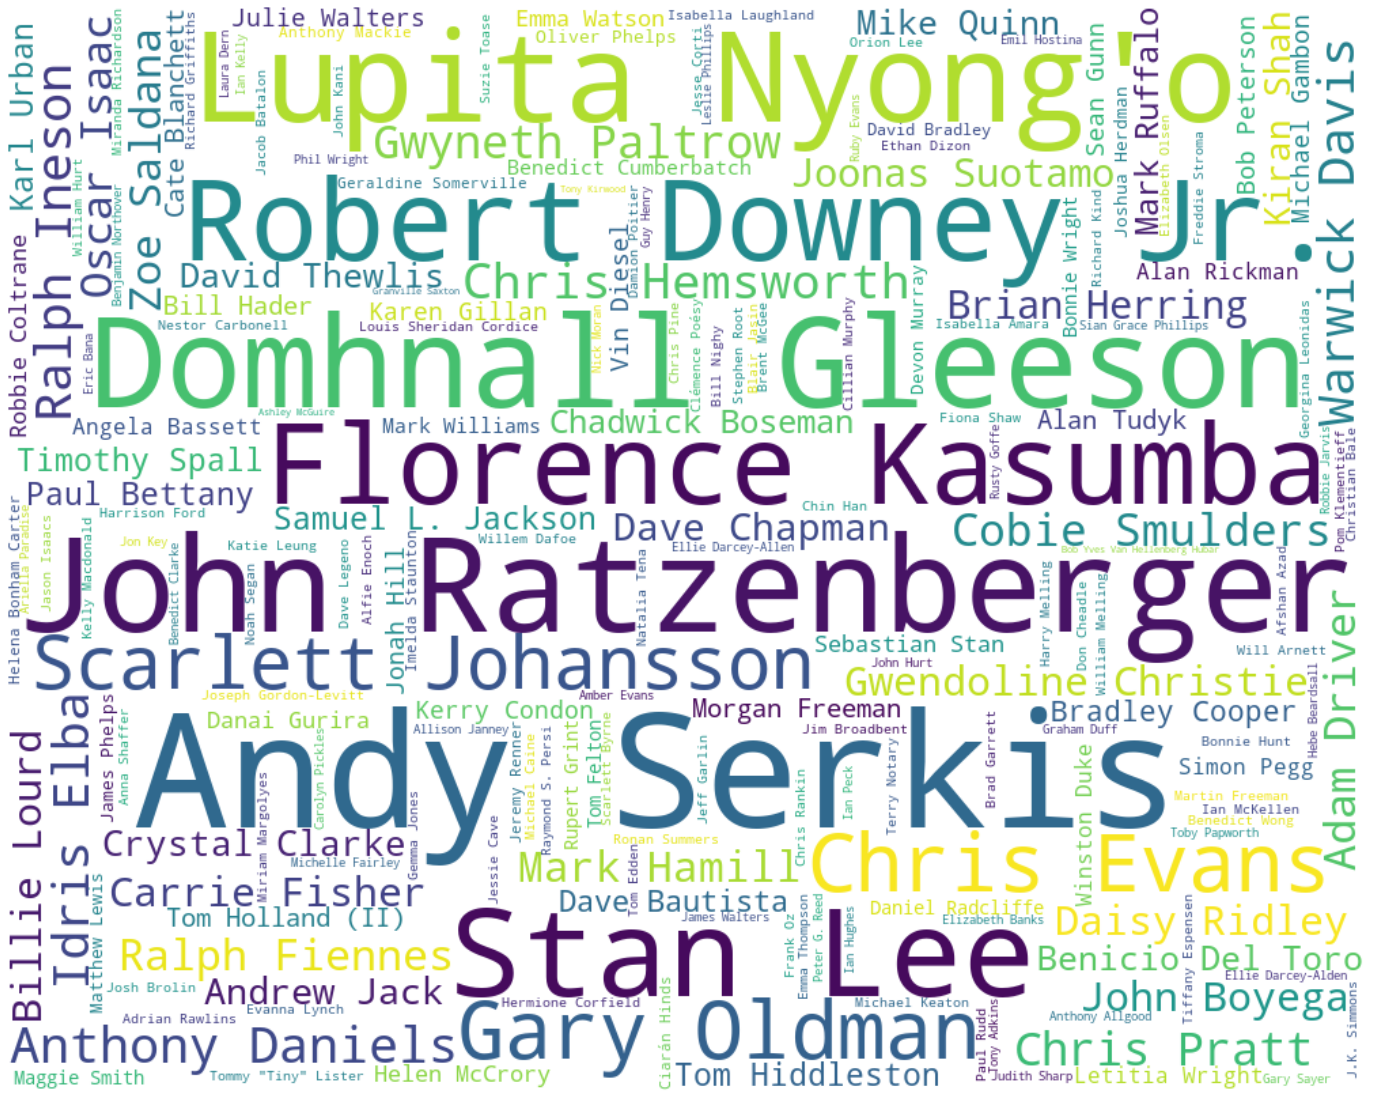

In [36]:
plt.figure(figsize = (30,20))
wordcloud = WordCloud(background_color = "white",width = 1000, height = 800,contour_width = 10,prefer_horizontal = 0.4,).generate_from_frequencies(cast_box)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

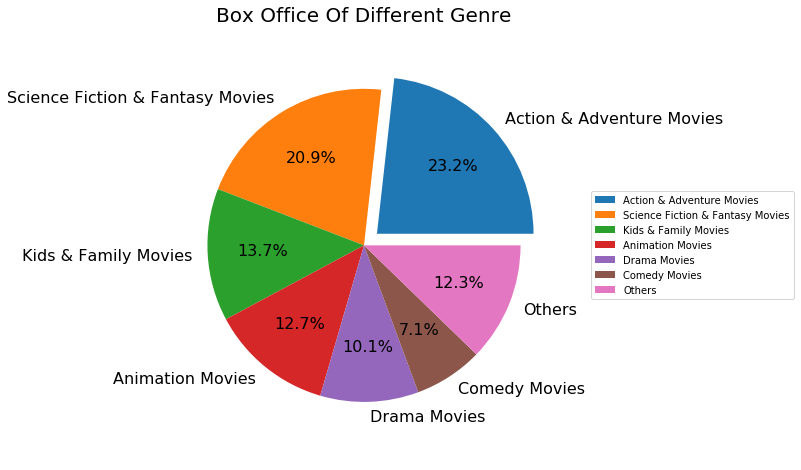

In [94]:
separate_num = 7
if(len(genre_box) < separate_num):
    separate_num = len(genre_box)

tempt = zip(genre_box, genre_name)
tempt = sorted(tempt, reverse = True)

# count total of others
total = 0
for i in range(separate_num, len(genre_box)):
    total += int(tempt[i][0])

tempt_box = []
tempt_name = []
# make data and label
for i in range(0, separate_num - 1):
    tempt_box.append(int(tempt[i][0]))
    tempt_name.append(str(tempt[i][1]))
tempt_box.append(total)
tempt_name.append("Others")

separate = []
# make separate
max_box_index = tempt_box.index(max(tempt_box))
for i in range(separate_num):
    if(i == max_box_index):
        separate.append(0.1)
    else:
        separate.append(0)
        
plt.figure(figsize=(12,8))
pictures,category_text,percent_text = plt.pie(tempt_box, 
                                              #colors = color, 
                                              labels = tempt_name, 
                                              autopct = "%0.1f%%", 
                                              explode = separate, 
                                              pctdistance = 0.65, 
                                              radius = 0.9, 
                                              #center = (0,-10), 
                                              textprops = {"fontsize" : 16},
                                              shadow = False)
plt.title("Box Office Of Different Genre", {"fontsize" : 20})
plt.legend(loc = "right", bbox_to_anchor=(1.5, 0.5))
plt.show()